In [4]:
import numpy as np
from PIL import Image
from skimage import io
import glob

In [55]:
# edit your path here
path = 'data/cellpose_segmentation/augmented_prediction/40kV_DR_reslice_180deg_ROI_8bits_z300z550_cp_masks/*.tif'

im_collection = io.imread_collection(path, plugin='tifffile')
volume = np.dstack(im_collection)

print('volume shape: ', volume.shape)

volume shape:  (650, 1414, 251)


In [56]:
properties = regionprops(volume)
diameter = np.zeros((len(properties), 2))
for i, p in enumerate(properties):
    min_y, min_x, min_z, max_y, max_x, max_z = p.bbox
    diameter[i, 0] = p.label
    diameter[i, 1] = max(max_x - min_x, max_y - min_y, max_z - min_z)  

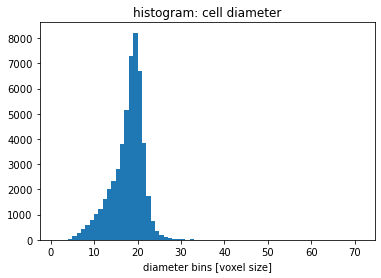

In [57]:
bins = np.unique(diameter[:,1])
fig = plt.figure()
plt.hist(diameter[:, 1], bins = bins) 
plt.title("histogram: cell diameter")
plt.xlabel('diameter bins [voxel size]')
plt.show()
fig.savefig('cell_diameter_distribution.jpg')